In [286]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [287]:
def derFun(Func,x,method='central') :
    h=0.1
    
    if method=='fore':
        derivative=(Func(x+h)-Func(x))/h
    elif method=='back':
        derivative=(Func(x)-Func(x-h))/h
    elif method=='central':
        derivative=(Func(x+h)-Func(x-h))/(2*h)
    return derivative


In [293]:

F=np.sin
Fprime=np.cos
p=8

tanActual=Fprime(p)*(X-p)+F(p)

tanFore=derFun(F,p,'fore') *(X-p)+F(p)
tanBack=derFun(F,p,'back') *(X-p)+F(p)
tanCentral=derFun(F,p,'central') *(X-p)+F(p)
tangentDict={'actual':tanActual,'fore':tanFore,'back':tanBack,'central':tanCentral}

Text(0, 0.5, 'sin(x)')

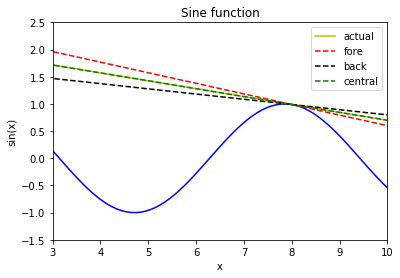

In [299]:
X=np.linspace(0,10,100)
Y=np.sin(X)
plt.plot(X,Y,'b')
plt.plot(X,tangentDict['actual'],'-y',label='actual')
plt.plot(X,tangentDict['fore'],'--r',label='fore')
plt.plot(X,tangentDict['back'],'--k',label='back')
plt.plot(X,tangentDict['central'],'--g',label='central')

plt.legend(loc='best')
plt.axis([3,10,-1.5,2.5])
plt.title('Sine function')
plt.xlabel('x')
plt.ylabel('sin(x)')

# """""""""""""""""""""""""""""""""""""""""

In [396]:
xlist=[0.1,10.0,100.0]
method=['fore','back','central']
cosVal=np.zeros([3,3])
expVal=np.zeros([3,3])

for x in range(len(xlist)):
    for m in range(len(method)):
        cosVal[x][m]=derFun(np.cos,xlist[x],method[m])
        
for x in range(len(xlist)):
    for m in range(len(method)):
        expVal[x][m]=derFun(np.exp,xlist[x],method[m])
        

In [397]:
import pandas as pd
data=cosVal
cosDF=pd.DataFrame(data)
cosDF.columns=['foreward','backward','central']
cosDF.insert(0,'x-value',xlist)


In [398]:
cosDF

x-value  foreward  backward   central
0      0.1 -0.149376 -0.049958 -0.099667
1     10.0  0.585033  0.501196  0.543115
2    100.0  0.462442  0.548602  0.505522

In [399]:
data=expVal
expDF=pd.DataFrame(data)
expDF.columns=['foreward','backward','central']
expDF.insert(0,'x-value',xlist)

In [400]:
expDF

x-value      foreward      backward       central
0      0.1  1.162318e+00  1.051709e+00  1.107014e+00
1     10.0  2.316544e+04  2.096095e+04  2.206319e+04
2    100.0  2.827117e+43  2.558082e+43  2.692600e+43

# """""""""""""""""""""""""""""""""""""""""

In [415]:
h=1.0
flag=0 
hList=[]
while flag!=1:
    hList.append(h)
    h= h / 2
    one=1.0+h
    if one==1:
        flag=1

In [416]:
print(hList)

[1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-05, 3.0517578125e-05, 1.52587890625e-05, 7.62939453125e-06, 3.814697265625e-06, 1.9073486328125e-06, 9.5367431640625e-07, 4.76837158203125e-07, 2.384185791015625e-07, 1.1920928955078125e-07, 5.960464477539063e-08, 2.9802322387695312e-08, 1.4901161193847656e-08, 7.450580596923828e-09, 3.725290298461914e-09, 1.862645149230957e-09, 9.313225746154785e-10, 4.656612873077393e-10, 2.3283064365386963e-10, 1.1641532182693481e-10, 5.820766091346741e-11, 2.9103830456733704e-11, 1.4551915228366852e-11, 7.275957614183426e-12, 3.637978807091713e-12, 1.8189894035458565e-12, 9.094947017729282e-13, 4.547473508864641e-13, 2.2737367544323206e-13, 1.1368683772161603e-13, 5.684341886080802e-14, 2.842170943040401e-14, 1.4210854715202004e-14, 7.105427357601002e-15, 3.552713678800501e-15, 1.7763568394002505e-15, 8.881784197001252e-16, 4.4408920985006

In [437]:
def foreDiff(func,x,h):
    derivative=(func(x+h)-func(x))/h
    return derivative

In [462]:
x=6
derList=[]
errList=[]
exact=np.cos(x)
for h in hList:  
    der=foreDiff(np.sin,x,h)
    derList.append(der)
    relErr=abs(exact-der)/der
    errList.append(relErr)

/data/user/0/ru.iiec.pydroid3/files/aarch64-linux-android/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  


Text(0.5, 1.0, 'Stepsize Vs Relative error')

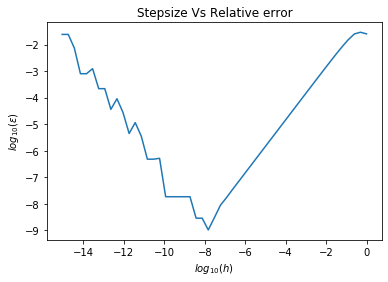

In [472]:
X=np.log10(hList)
Y=np.log10(errList)
plt.plot(X,Y)
plt.xlabel('$ log_{10}(h)$')
plt.ylabel('$ log_{10}(\epsilon)$')
plt.title('Stepsize Vs Relative error')
